<a href="https://colab.research.google.com/github/Danyelaalmeida18/Aula_Visualizacao_Dados/blob/main/PONTO_EXTRA_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXERCÍCIO**

##*Bibliotecas*

In [ ]:
# Bibliotecas e dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

##**Considere o conjunto de dados abaixo.**

In [ ]:
np.random.seed(42) #geração de números aleatórios, resultados sejam sempre os mesmos ao rodar o código.

alunos = [f'Aluno {i+1:02d}' for i in range(26)]

datas = pd.to_datetime(["2024-03-15", "2024-04-15", "2024-05-15"])

notas = {
    "Aluno": alunos,
    "A1": np.clip(np.random.normal(6.5, 1.5, 26), 0, 10),  # média 6.5, desvio 1.5, quantidade de alunos(26), nota(0 a 10)
    "A2": np.clip(np.random.normal(7.0, 1.2, 26), 0, 10),  # média 7.0, desvio 1.2, quantidade de alunos(26), nota(0 a 10)
    "A3": np.clip(np.random.normal(7.5, 1.0, 26), 0, 10),  # média 7.5, desvio 1.0, quantidade de alunos(26), nota(0 a 10)
}

df = pd.DataFrame(notas)
df_melt = df.melt(id_vars="Aluno", var_name="Avaliação", value_name="Nota")
df_melt["Data"] = df_melt["Avaliação"].map({"A1": datas[0], "A2": datas[1],
"A3": datas[2]})
df_melt.sort_values(by=["Data", "Aluno"], inplace=True)

df.head()

,Aluno,A1,A2,A3
0,Aluno 01,7.245071,5.618808,6.823078
1,Aluno 02,6.292604,7.450838,8.111676
2,Aluno 03,7.471533,6.279234,8.531000
3,Aluno 04,8.784545,6.649968,8.431280
4,Aluno 05,6.148770,6.277952,6.660782


## **Parte A**

### 1. *Crie um histograma das notas da Avaliação 1 (A1) usando Matplotlib.*

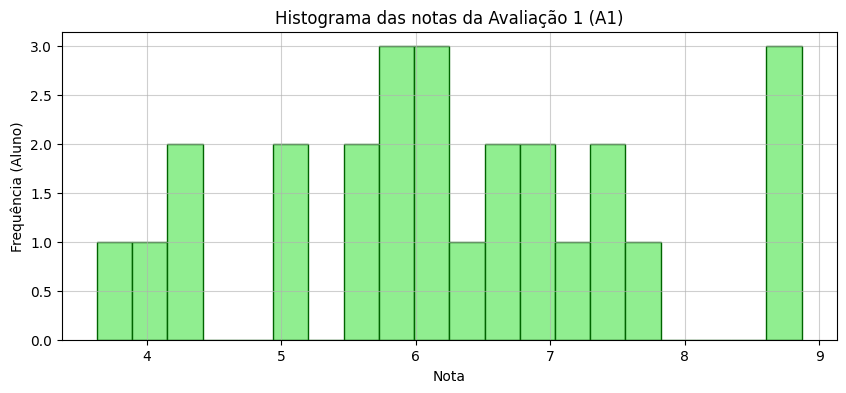

In [ ]:
# Histograma

plt.figure(figsize=(10, 4))
plt.hist(notas["A1"],
         bins=20,
         color='lightgreen',
         edgecolor='darkgreen'

)

plt.title('Histograma das notas da Avaliação 1 (A1)')
plt.xlabel('Nota')
plt.ylabel('Frequência (Aluno)')
plt.grid(True, alpha=0.6)
plt.show()

### 2. *Gere um boxplot para comparar as distribuições de A1, A2 e A3.*

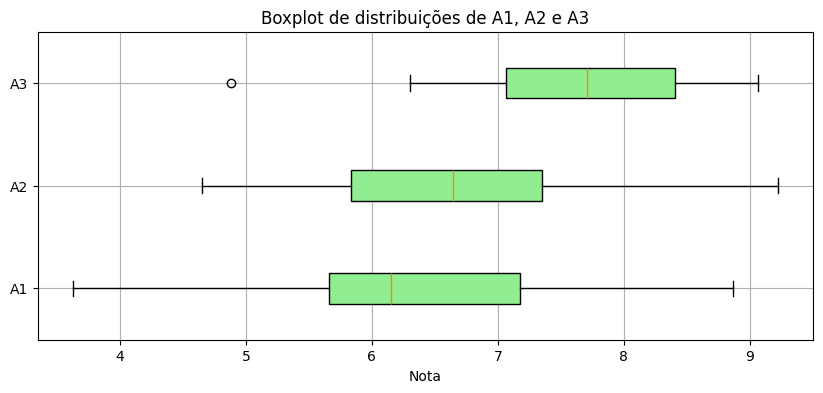

In [ ]:
# boxplot


plt.figure(figsize=(10, 4))
plt.boxplot([notas["A1"], notas["A2"], notas["A3"]], labels=["A1", "A2", "A3"],
    vert=False, # eixo de verificação
    patch_artist=True, # aspectos visuais/artísticos
    boxprops=dict(facecolor='lightgreen')) # cores

plt.title('Boxplot de distribuições de A1, A2 e A3')
plt.xlabel('Nota')
# plt.ylabel('')
plt.grid(True)
plt.show()



### 3.  *Calcule e interprete a média, mediana e curtose das notas da Avaliação 3 (A3).*

Biblioteca scipy.stats

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

In [ ]:
from scipy.stats import kurtosis # calcular a curtose, biblioteca 'scipy'


df = pd.DataFrame({  # (tabela) com uma única coluna chamada "A3"
     "A3": np.clip(np.random.normal(7.5, 1.0, 26), 0, 10) # média 7.5, desvio 1.0, quantidade de alunos(26), nota(0 a 10)
})

media = media = df["A3"].mean() # média da coluna 'A3'
mediana = df["A3"].median()   # mediana da coluna 'A3'
curtose = kurtosis(df["A3"])  # curtose da coluna 'A3'

print("Média:", media)
print("Mediana:", mediana)
print("Curtose:", curtose)


# OBS: Pesquisei uma biblioteca para calcular a Curtose da tabela 'A3', usando a função Kurtosis(), para a forma de distribuição dos dados



Média: 7.675562119211363
Mediana: 7.579940787514333
Curtose: -0.12405078671391356


## **Parte B**

### 1. *Com os dados reorganizados por data, crie um gráfico de linha com Plotly mostrando a média de notas da turma ao longo do tempo.*

In [ ]:
# 0 '2024-03-15' média 'A1'
# 1 '2024-04-15' média 'A2'
# 2 '2024-05-15' média 'A3'

media = df_melt.groupby("Data")["Nota"].mean().reset_index() #agrupar pela coluna data das avaliações, calcular a média da coluna 'nota' para cada data

figura = px.line(media,
              x="Data",
              y="Nota",
              markers=True,
              title="Média de notas da turma ao longo do tempo")

figura.show()


### 2. *Usando um boxplot temporal, compare a distribuição das notas em cada uma das datas das avaliações.*


In [ ]:
figura = px.box(df_melt,
                x="Data",
                y = "Nota",
                title  = "Boxplot temporal de Distribuição das notas"
)

figura.show()

### 3.*Descreva se você observa algum padrão de evolução do desempenho da turma ao longo do tempo.*

*Tem um padrão de evolução representado no gráfico de linha, na avaliação A1 no mês de Março, média **(6.27)** para A3 do mês de Maio, média **(7.62)**. Houve um aumento da média das notas. Também no gráfico de distribuição de notas (baxplot temporal) mostra a mediana das notas, onde a maioria dos alunos melhoraram sua nota, houve queda do desvio padrão, tornado as notas balanceada entre alunos, visto que os alunos com menor desempenho nas notas melhorassem ao longo tempo.*